<a href="https://colab.research.google.com/github/pemba007/motor-ml/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./accelerometer.csv')

In [ ]:
df.shape

(153000, 5)

In [ ]:
# Remove later

# df = df.iloc[:1000,:]

In [ ]:
df.shape

(153000, 5)

In [ ]:
df.describe()

,wconfid,pctid,x,y,z
count,153000.000000,153000.000000,153000.000000,153000.000000,153000.000000
mean,2.000000,60.000000,0.995622,0.005351,-0.117769
std,0.816499,24.494977,0.773958,0.742602,0.517008
min,1.000000,20.000000,-8.000000,-8.000000,-5.867000
25%,1.000000,40.000000,0.945000,-0.078000,-0.172000
50%,2.000000,60.000000,0.992000,0.008000,-0.125000
75%,3.000000,80.000000,1.039000,0.105000,-0.066000
max,3.000000,100.000000,7.996000,7.996000,6.086000


In [ ]:
# Unique values in wconfid, pctid
print("Unique values in wconfid", df['wconfid'].unique())
print("Unique values in pctid", df['pctid'].unique())

Unique values in wconfid [1 2 3]
Unique values in pctid [ 20  25  30  35  40  45  50  55  60  65  70  75  80  85  90  95 100]


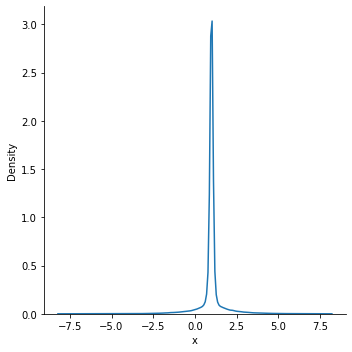

In [ ]:
sns.displot(x = df['x'], kind='kde')

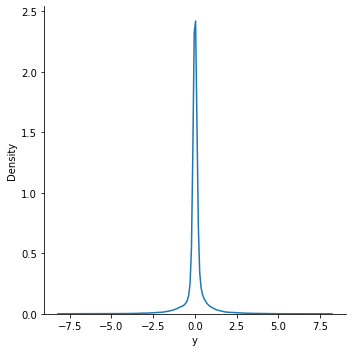

In [ ]:
sns.displot(x = df['y'], kind='kde')

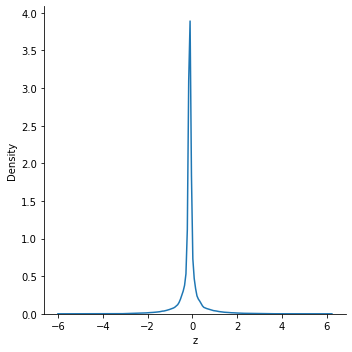

In [ ]:
sns.displot(x = df['z'], kind='kde')

In [ ]:
# Separating target variable
y = df['wconfid']
df.drop(columns=['wconfid'], inplace=True)

In [ ]:
# df = df.to_numpy()
# y = y.to_numpy()

# Implementing ANN with 5 fold

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, RocCurveDisplay, classification_report, auc, f1_score, multilabel_confusion_matrix

skf = StratifiedKFold(n_splits=5)

conf_matrixes = list()

fpr = dict()
tpr = dict()
roc_auc = dict()

accuracy_scores = list()

actual_classes = np.empty([0], dtype=int)
predicted_classes = np.empty([0], dtype=int)

for train_index, test_index in skf.split(df, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = df.iloc[train_index,:], df.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    clf = MLPClassifier().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Calculating accuracy score
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
    cmf = multilabel_confusion_matrix(y_test, y_pred)
    conf_matrixes.append(cmf)

    actual_classes = np.append(actual_classes, y_test)
    predicted_classes = np.append(predicted_classes, y_pred)

    # Calculating values for the ROC Curve
    

TRAIN: [ 10200  10201  10202 ... 152997 152998 152999] TEST: [     0      1      2 ... 112197 112198 112199]
TRAIN: [     0      1      2 ... 152997 152998 152999] TEST: [ 10200  10201  10202 ... 122397 122398 122399]
TRAIN: [     0      1      2 ... 152997 152998 152999] TEST: [ 20400  20401  20402 ... 132597 132598 132599]
TRAIN: [     0      1      2 ... 152997 152998 152999] TEST: [ 30600  30601  30602 ... 142797 142798 142799]
TRAIN: [     0      1      2 ... 142797 142798 142799] TEST: [ 40800  40801  40802 ... 152997 152998 152999]


In [ ]:
cm = multilabel_confusion_matrix(actual_classes, predicted_classes)

res = []

for l in [0,1,2]:
    x = cm[l]
    tn, fp = x[0]
    fn, tp = x[1]
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1 = (2 * precision * sensitivity) / (precision + sensitivity)
    res.append([l,sensitivity, specificity, f1])

frame = pd.DataFrame(res, columns = ['Class','Sensitivity(Recall)','Specificity', 'F1 score'])

total_accuracy = accuracy_score(actual_classes, predicted_classes)
print("The total accuracy is", total_accuracy)

The total accuracy is 0.5847385620915033


In [ ]:
print(frame)

   Class  Sensitivity(Recall)  Specificity  F1 score
0      0             0.533196     0.705118  0.502314
1      1             0.410569     0.830206  0.469179
2      2             0.810451     0.841784  0.762102


In [ ]:
from sklearn import metrics

# Getting the ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(actual_classes, predicted_classes)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()

ValueError: ignored